# Titanic disaster

In [677]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [678]:
df = pd.read_csv("./data/titanic_train.csv")
df_test = pd.read_csv("./data/titanic_test.csv")

### First look at the data:

In [679]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the initial look at the data we will do the followings:
1. `Cabin` has missing values, we will need to take care of that.
2. `Name` we will transform into more informative data.
3. `Sex` we will assign `0` for `male` and `1` for `female`.
4. `Ticket` find a pattern so we can interpret it.

From the variables description we will interpret the following features:
1. `Pclass` - which class of the passenger, int in range of 1-3, (1st, 2nd, 3rd).
2. `SubSp` - # of siblings and spouses
3. `Parch` - # of parents and children

In [680]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [681]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [682]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

`Embarked` column has only 2 null values, we will replace those with the most common value.
`Age` has 177 missing values, we will try to find any connection between other features that influence `Age`.
`Cabin` has 687 missing values, since its an object type we will fill the missing values with the letter `O` for Other.

## Analyzing and Engineering of features

### Pclass vs Survived

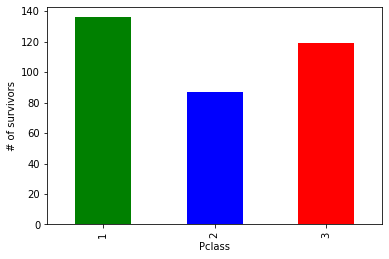

In [683]:
df.groupby("Pclass")['Survived'].agg(sum).plot.bar(color=['g', 'b', 'r'])
plt.ylabel("# of survivors")
plt.show()

In [684]:
df.groupby("Pclass")['Survived'].agg(sum)

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

<AxesSubplot:>

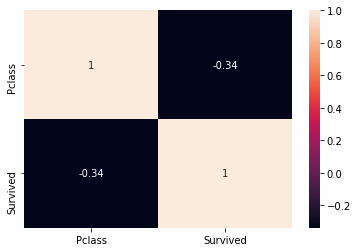

In [685]:
sns.heatmap(df[["Pclass", 'Survived']].corr(), annot=True)

### Name feature

We will try and see if the first letter of the first name or the title of the passenger is affecting the passenger survival.

In [686]:
title = df['Name'].apply(lambda x: x.replace("(", "").replace(")", "").split(".")[0].split(",")[1].strip())
survived = df['Survived']

In [687]:
demo = pd.DataFrame({"Survived": survived, "title": title})

In [688]:
title_dummies = pd.get_dummies(demo['title'])
demo = pd.concat([demo, title_dummies], axis=1)
demo.drop("title", axis=1, inplace=True)

In [689]:
demo.head()

,Survived,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


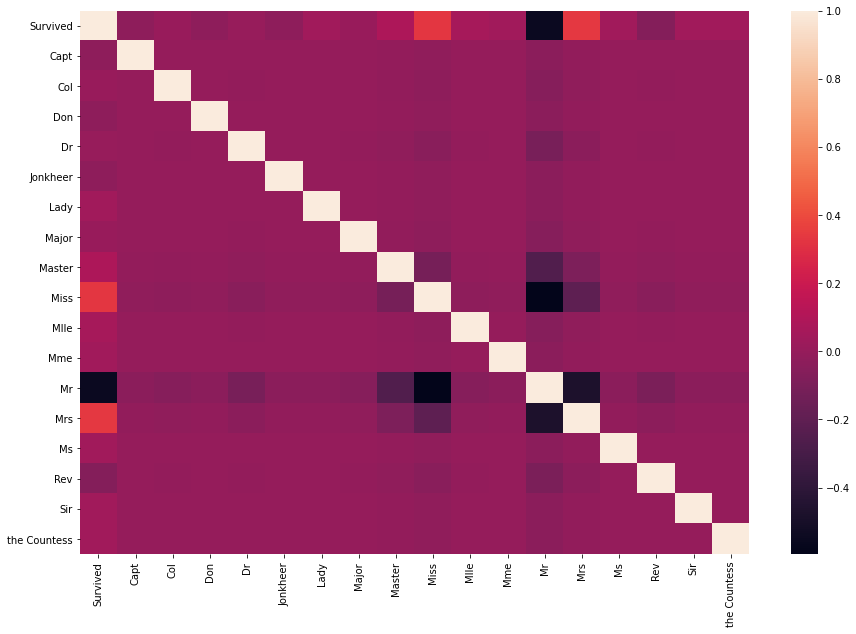

In [690]:
plt.figure(figsize=(15,10))
sns.heatmap(demo.corr())
plt.show()

We are able to **see that there is a connection** between **`title`** attribute of the passenger and his **survival**.  

Especially we see a connection between the titles `Miss` and `Mrs` with survival.

In [691]:
title_dummies = title_dummies[['Miss', 'Mrs']]
title_dummies.columns = [0,1]

We will add those features to our dataset:

In [692]:
df = pd.concat([df, title_dummies], axis = 1)
df.drop(['Name'], axis=1, inplace=True)

<AxesSubplot:>

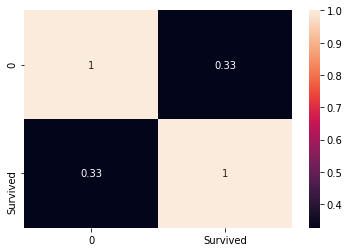

In [693]:
sns.heatmap(df[[0, 'Survived']].corr(), annot=True)

<AxesSubplot:>

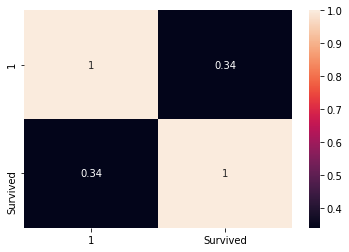

In [694]:
sns.heatmap(df[[1, 'Survived']].corr(), annot=True)

In [695]:
df.rename(columns={0: "Miss", 1: "Mrs"}, inplace=True)

### Sex feature

First we will convert the `male`, `female` labels into numeric values, `0`, `1.

In [696]:
df['Sex'] = df['Sex'].map({"male": 0, "female": 1})

In [697]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Miss,Mrs
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,0


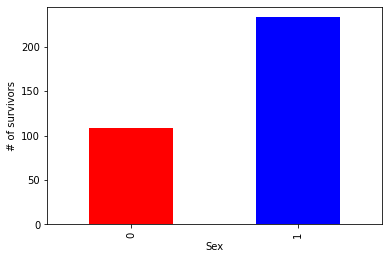

In [698]:
df.groupby("Sex")['Survived'].agg(sum).plot.bar(color=['r', 'b'])
plt.ylabel("# of survivors")
plt.show()

In [699]:
df.groupby("Sex")['Survived'].agg(sum)

Sex
0    109
1    233
Name: Survived, dtype: int64

Saving the women and children first

<AxesSubplot:>

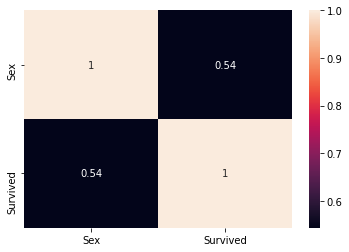

In [700]:
sns.heatmap(df[['Sex', 'Survived']].corr(), annot=True)

### Fare feature

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

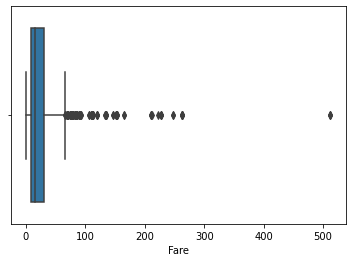

In [701]:
sns.boxplot(df['Fare'])

We can see that there are some extreme high outliers here, let us remove the ones that are above 500:

In [702]:
mask = df['Fare'] > 500.0
len(df[mask])

3

In [703]:
df.drop(df[mask].index, axis=0, inplace=True)

<AxesSubplot:>

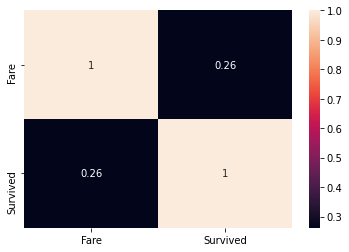

In [704]:
sns.heatmap(df[['Fare', 'Survived']].corr(), annot=True)

### SibSp feature

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

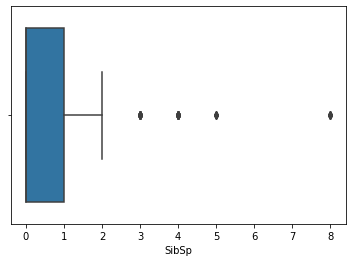

In [705]:
sns.boxplot(df['SibSp'])

In [706]:
mask_sib = df['SibSp'] > 5
len(df[mask_sib])

7

We will remove those outliers observations:

In [707]:
df.drop(df[mask_sib].index, axis=0, inplace=True)

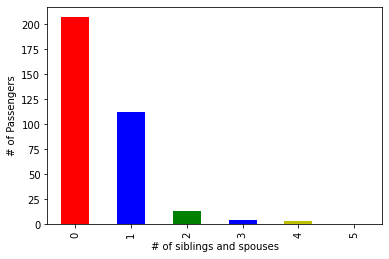

In [708]:
df.groupby("SibSp")['Survived'].agg(sum).plot.bar(color=['r', 'b', 'g', 'b', 'y'])
plt.ylabel("# of Passengers")
plt.xlabel("# of siblings and spouses")
plt.show()

<AxesSubplot:>

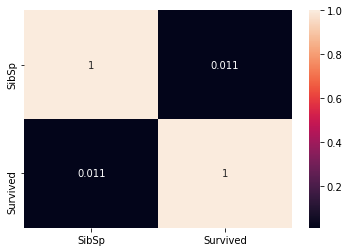

In [709]:
sns.heatmap(df[['SibSp', 'Survived']].corr(), annot=True)

### Parch feature

<AxesSubplot:xlabel='Parch'>

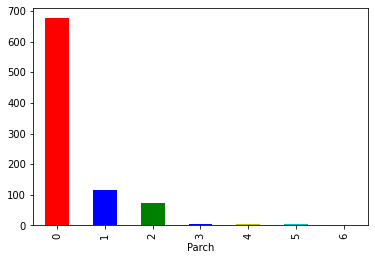

In [710]:
df.groupby('Parch')['Survived'].agg("count").plot.bar(color=['r', 'b', 'g', 'b', 'y', 'c'])

In [711]:
df.groupby('Parch')['Survived'].agg("count")

Parch
0    676
1    117
2     73
3      5
4      4
5      5
6      1
Name: Survived, dtype: int64

<AxesSubplot:>

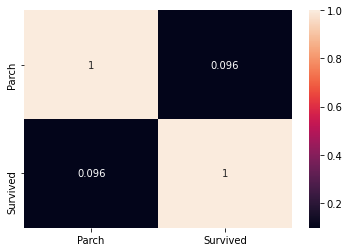

In [712]:
sns.heatmap(df[['Parch', 'Survived']].corr(), annot=True)

Also not a very good relationship

### Embarked feature

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

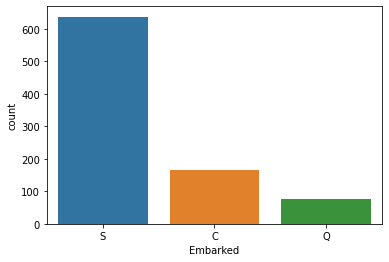

In [713]:
sns.countplot(df['Embarked'])

In [714]:
df.groupby('Embarked')['Survived'].agg("count")

Embarked
C    165
Q     77
S    637
Name: Survived, dtype: int64

In [715]:
df['Embarked'] = df['Embarked'].map({"S": 0, "C": 1, "Q": 2})

<AxesSubplot:>

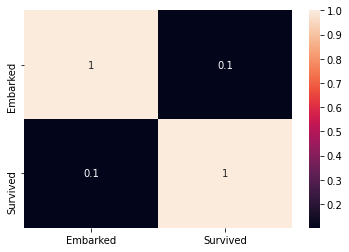

In [716]:
sns.heatmap(df[['Embarked', 'Survived']].corr(), annot=True)

**Handling the missing values - replace with the most common, which is `S`**

In [717]:
df['Embarked'] = df['Embarked'].fillna(0)

In [718]:
df['Embarked'].isnull().sum()

0

### Cabin feature

In [719]:
df['Cabin'].isnull().sum()

679

In [720]:
df[df['Cabin'].isnull()]['Cabin'][0]

nan

In [721]:
def get_first_letter(x):
    if pd.isnull(x):
        return 10
    return x[0]
df['Cabin'] = df['Cabin'].apply(get_first_letter)

In [722]:
df['Cabin'] = df['Cabin'].map(dict(zip(df['Cabin'].unique()[1:], range(2, 2+len(df['Cabin'].unique()[1:])))))

<AxesSubplot:xlabel='Cabin'>

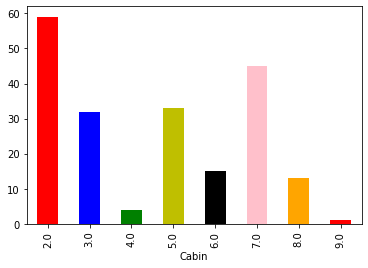

In [723]:
df.groupby("Cabin")['Survived'].agg("count").plot.bar(color=['r', 'b', 'g', 'y', 'black', 'pink', 'orange'])

<AxesSubplot:>

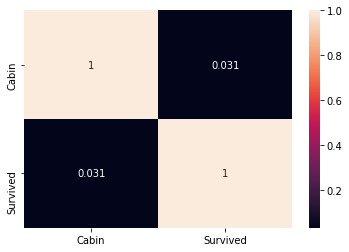

In [724]:
sns.heatmap(df[['Cabin', 'Survived']].corr(), annot=True)

In [725]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Miss', 'Mrs'],
      dtype='object')

In [726]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Miss,Mrs
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,2.0,1.0,0,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,0
3,4,1,1,1,35.0,1,0,113803,53.1000,2.0,0.0,0,1
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0.0,0,0


In [727]:
df.drop(['Ticket'], axis=1, inplace=True)

### Age feature

In [728]:
df['Age'].isnull().sum()

170

We have 170 missing values for the `Age` feature, lets see if we can fill the missing values with linear regression.

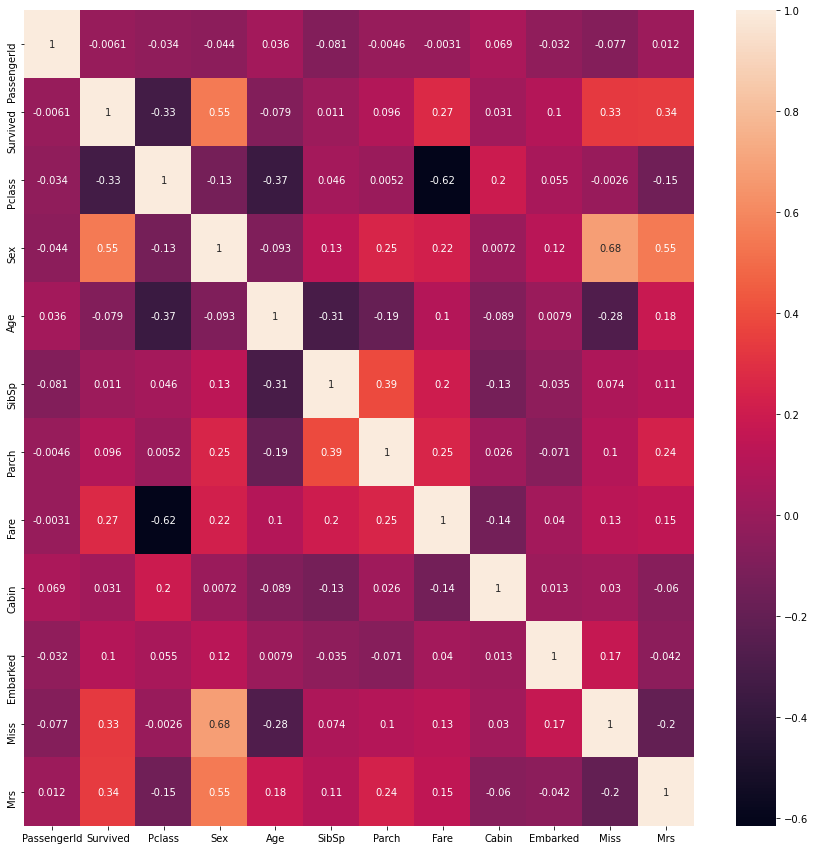

In [729]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

We tried to see if there is a connection between `Age` and another feature but it seams that there is no correlation.

## Model and training

In [736]:
y = df['Survived'].values

In [787]:
X = X.drop(['Age'], axis=1)
X

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Miss,Mrs
0,3,0,1,0,7.2500,10.0,0.0,0,0
1,1,1,1,0,71.2833,2.0,1.0,0,1
2,3,1,0,0,7.9250,10.0,0.0,1,0
3,1,1,1,0,53.1000,2.0,0.0,0,1
4,3,0,0,0,8.0500,10.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
886,2,0,0,0,13.0000,10.0,0.0,0,0
887,1,1,0,0,30.0000,7.0,0.0,1,0
888,3,1,1,2,23.4500,10.0,0.0,1,0
889,1,0,0,0,30.0000,2.0,1.0,0,0


### Using PCA to reduce the number of features

In [791]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X)

### Split the dataset into train and test sets

In [792]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_pca, y)

### Selecting the candidates for our ensemble model
We will try different algorithms for classification and select several that works best on our data:
1. LinearSVC
2. KNeighborsClassifier
3. LogisticRegression
4. AdaBoostClassifier
5. RandomForestClassifier
6. GradientBoostingClassifier

Using cross validation we will get the score of our model performance.

In [793]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

random_state = 2
clfs = {}
clfs.update({"SVM": LinearSVC(random_state=random_state)})
clfs.update({"KNN": KNeighborsClassifier()})
clfs.update({"LR": LogisticRegression(random_state = random_state)})

clfs.update({"ADA": AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1)})
clfs.update({"RF": RandomForestClassifier(random_state=random_state)})
clfs.update({"GBC": GradientBoostingClassifier(random_state=random_state)})

In [794]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=10)
results = []
for clf in clfs:
    results.append(cross_val_score(clfs[clf], X=X_train, y=y_train, cv=cv))

/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("L

### Results of the algorithms

In [795]:
clfs_res = dict(zip(clfs.keys(), results))

In [796]:
means = []
for res in clfs_res:
    means.append(np.around(clfs_res[res].mean(), 2))

<Figure size 1080x360 with 0 Axes>

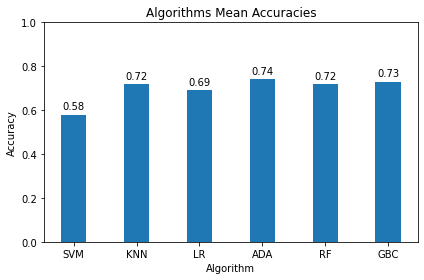

In [797]:
plt.figure(figsize=(15, 5))
values = means

width = 0.4 # set the width of the bar
bar_locations = np.arange(len(values))

fig, ax = plt.subplots() # create a figure and add a bar chart
bars = ax.bar(bar_locations, values, width)

ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')
ax.set_title('Algorithms Mean Accuracies')
ax.set_xticks(np.array(np.arange(len(values))))
ax.set_xticklabels(clfs_res.keys())
ax.set_ylim(0, 1)

for bar in bars:
    h = bar.get_height()
    ax.annotate(h, xy=(bar.get_x() + bar.get_width()/2, h), xytext=(0, 3), 
                textcoords='offset points', ha='center', va='bottom')

fig.tight_layout()
plt.show()

We can see that `ADA`, `GBC`, `KNN` and `RF` did the best out of the 6 algorithms we choose, and we will select them for our ensemble model.

## Prepare data for XGBoost classefier
The ensemble model will get the predictions of the models we selected and train on those predictions.

In [860]:
from sklearn.model_selection import KFold, RandomizedSearchCV
seed = 0
n_splits = 5
kf = KFold(n_splits=n_splits)

### Function for getting the mean predictions of the KFold method
Each classifier will train on the data and try to predict the test data.

In [861]:
def get_mean_class(clf, x_train, y_train, x_test):
    mean_train = np.zeros((len(x_train),))
    mean_test = np.zeros((len(x_test),))
    mean_test_skf = np.empty((n_splits, len(x_test)))
    
    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        clf.fit(x_tr, y_tr)
        
        mean_train[test_index] = clf.predict(x_te)
        mean_test_skf[i, :] = clf.predict(x_test)
    
    mean_test[:] = mean_test_skf.mean(axis=0)
    return mean_train.reshape(-1, 1), mean_test.reshape(-1, 1)

Running the above method with the classifiers we selected earlier.  
we combine the results for our ensemble model:

In [902]:
gb_params = {
    'n_estimators': 200,
    'verbose': 0
}


rf_params = {
    'n_jobs': -1,
    'n_estimators': 200,
    'verbose': 0
}

clfs = []
clfs.append(("GBC", GradientBoostingClassifier(**gb_params)))
clfs.append(("KNN", KNeighborsClassifier(weights='distance', n_neighbors=7)))
clfs.append(("ADA", AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.8, n_estimators= 200)))
clfs.append(("RF", RandomForestClassifier(**rf_params)))

mean_x_tests, mean_x_trains = [], []
_y_train = []
for clf in clfs:
    mean_train, mean_test = get_mean_class(clf[1], X_train, y_train, X_test)
    mean_x_tests.extend(mean_test)
    mean_x_trains.extend(mean_train)
    
mean_tests, mean_trains = np.array(mean_x_tests), np.array(mean_x_trains)

**Function for printing the results of each candidate in our randomized search**  
Showing the validation score and the parameter the specific experiment used.

In [903]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

## Train the XGBoost classifier
Construct the XGBoost classifier and perform Randomized Search to find the best parameters.

In [904]:
import xgboost as xgb
import scipy
xgb_params = {
    "gamma": scipy.stats.uniform(0.1, 0.7),
    "learning_rate": scipy.stats.uniform(0.05, 0.1), # default 0.1 
    "max_depth": scipy.stats.randint(2, 10), # default 3
    "n_estimators": scipy.stats.randint(100, 150), # default 100
    "subsample": scipy.stats.uniform(0.6, 0.4),
    "min_child_weight": scipy.stats.randint(2,6)
}
gbm = xgb.XGBClassifier()
search = RandomizedSearchCV(gbm, 
                            param_distributions=xgb_params, 
                            random_state=42, 
                            n_iter=200, 
                            cv=3, 
                            verbose=1, 
                            n_jobs=1, 
                            return_train_score=True)
_y_train = np.array([y_train] * len(clfs)).flatten()
search.fit(mean_trains, _y_train)
report_best_scores(search.cv_results_, 1)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model with rank: 1
Mean validation score: 0.726 (std: 0.004)
Parameters: {'gamma': 0.3621780831931537, 'learning_rate': 0.14507143064099162, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 120, 'subsample': 0.6624074561769746}

Model with rank: 1
Mean validation score: 0.726 (std: 0.004)
Parameters: {'gamma': 0.20919616423534185, 'learning_rate': 0.05580836121681995, 'max_depth': 9, 'min_child_weight': 2, 'n_estimators': 135, 'subsample': 0.6571467271687763}

Model with rank: 1
Mean validation score: 0.726 (std: 0.004)
Parameters: {'gamma': 0.555621931064197, 'learning_rate': 0.05564115790271003, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 129, 'subsample': 0.6849356442713105}

Model with rank: 1
Mean validation score: 0.726 (std: 0.004)
Parameters: {'gamma': 0.22727747704497042, 'learning_rate': 0.06834045098534339, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 121, 'subsample': 0.6028265220878869}

Model with rank: 1
Mean validation score: 0.726 (std: 0.004

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   14.3s finished


## Build the model using the tuned parameters we found

In [920]:
tuned_params = {'gamma': 0.1811083416675908, 'learning_rate': 0.13631034258755936, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 133, 'subsample': 0.6381640465961645}
gbm = xgb.XGBClassifier(**tuned_params)
gbm.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1811083416675908,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.13631034258755936, max_delta_step=0, max_depth=9,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=133, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.6381640465961645, tree_method='exact',
              validate_parameters=1, verbosity=None)

## Results of the classifier

**Mean cross validation test**

In [925]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(gbm, X_test, y_test, cv=kf)

In [926]:
results.mean()*100

72.85858585858585

**ROC curve and Accuracy score**

Accuracy Score: 0.7601809954751131
ROC curve:




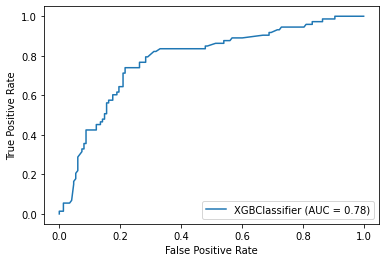

In [936]:
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix
res = gbm.predict(X_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, res)))
print("ROC curve:")
plot_roc_curve(gbm, X_test, y_test)
plt.show
print("\n")

**Confusion Matrix**

Confusion Matrix:


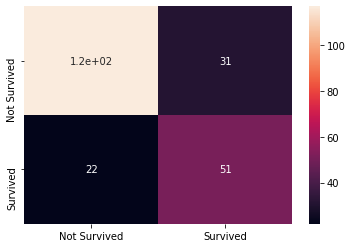

In [945]:
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, res), annot=True)
plt.xticks([0.5, 1.5], ['Not Survived', 'Survived'])
plt.yticks([0.5, 1.5], ['Not Survived', 'Survived'])
plt.show()